---
title: "Assessing model fit"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-013"
categories: [python, datacamp, statistics, machine learning, linear regression]
image: "assessingModelFit.jpg"

---

# Assessing model fit

What questions to ask your model to determine its fit. We will discuss how to quantify how well a linear regression model fits, how to diagnose problems with the model using visualizations, and how each observation impacts the model.

This **Assessing model fit** is part of [Datacamp course: Introduction to Regression with statsmodels in Python](https://app.datacamp.com/learn/courses/introduction-to-regression-with-statsmodels-in-python)

This is my learning experience of data science through DataCamp

In [1]:
# Import numpy with alias np
import numpy as np
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
# Import the ols function
from statsmodels.formula.api import ols

## Quantifying model fit

Analyze and assess the accuracy of model predictions.

Coefficient of determination: R-squared (1 is the best, 0 is as good as randomness).

The proportion of variance in the response variable that is predictable (explainable) by the explanatory variable. This information indicates whether the model at hand is effective in resuming our data or not. Data, context, and the way we transform variables heavily impact r-squared interpretation.

Accessible inside .summary() or .rsquared

Residual standard error (RSE)

The residual is the difference between the predicted and observed response values (the distance). It has the same unit as the response.

MSE = RSE**2 RSE = np.sqrt(MSE)

Accessible with .mse_resid()

RSE is calculated manually by taking the square of each residual. The degrees of freedom are calculated (# of observations minus # of model coefficients). Then we take the square root of the sum divided by the deg_freedom.

Root mean square error

Unlike MSE, we do not remove degrees of freedom (we divide only by the number of observations).

## Coefficient of determination

A coefficient of determination measures how well the linear regression line fits the observed values. It is equal to the square root of the correlation between the explanatory and response variables in a simple linear regression.


In [2]:
# fetch data for which model is created
ad_conversion=pd.read_csv('dataset/ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [3]:
# click vs impression model
mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions' , data = ad_conversion).fit()
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

# qdrnt click vs impression model
mdl_click_vs_impression_trans = ols('qdrt_n_clicks ~ qdrt_n_impressions  ' , data = ad_conversion).fit()
# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:10:19   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [6]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

print("\n The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.")

0.8916134973508041
0.9445272817143905

 The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.


## Residual standard error

The residual standard error (RSE) measures the typical residual size. Predictions are measured by how wrong they can be. The data fits better with smaller numbers, with zero being perfect

In [8]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478134
RSE of transformed model:  0.19690640896875722


## Visual model fit

If the model is well fitted, the residuals should be normally distributed along the line/curve, and the mean should be zero. In addition, it indicates when the fitted residuals are positive or negative (above/below the straight line).

Residual VS fitted values chart

Trends can be visualized using this tool. The best accuracy is achieved by following the y=0 line. There is a problem if the curve goes all over the place.

sns.residplot()

Q-Q Plot

The best conditions are validated if the points track along a straight line and are normally distributed. Otherwise, they are not.

qqplot() (from statsmodels.api import qqplot)

Square root of Standardized Residuals VS fitted values, Scale-location plot

As the fitted values change, the residuals change in size and whether they become smaller or larger. If it bounces all over or is irregular, it means residuals tend to vary randomly or in an inconsistent manner as fitted values change.

## Drawing diagnostic plots

Let's draw diagnostic plots using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

In [9]:
taiwan_real_estate=pd.read_csv("dataset/taiwan_real_estate2.csv")
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [10]:
mdl_price_vs_conv=ols("price_twd_msq ~ n_convenience",data=taiwan_real_estate).fit()

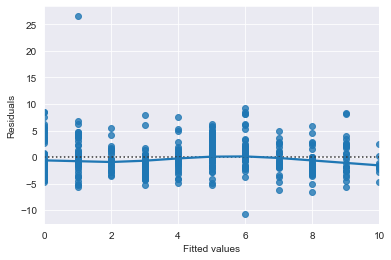

In [12]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

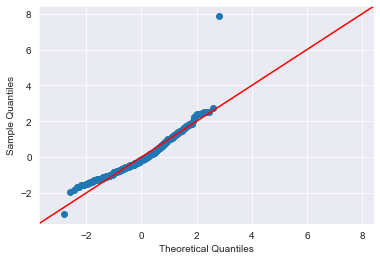

In [13]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

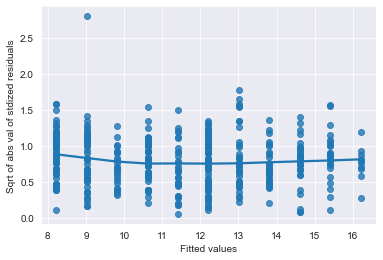

In [14]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

In [15]:
print("Above three diagnostic plots are excellent for sanity-checking the quality of your models")

Above three diagnostic plots are excellent for sanity-checking the quality of your models


# Outliers, leverage & influence

Our models can be significantly affected by some special values. A slope can be completely altered by removing one or two extreme datapoints.

Unusual datapoints, outliers, data is extreme

There are two ways to visualize them, they can be either far away from the model fit, or they can be far away from the datapoint along the fit (horizontally / vertically).

Leverage & influence

The concepts of leverage and influence are important when determining whether some unusual data points are negatively affecting your model.

Leverage measures the extreme values of the explanatory variables. Since most of the observations have a short distance to the nearest MRT station, observations with long distances are more extreme. High leverage points are those with explanatory variables that are farthest away from one another.

In modeling, influence is the amount that the model would change if the observation were not included in the dataset. Due to their large residuals and distance from other observations, observations far from the trend line are expected to have a high influence. There was a majority of influential houses with prices that were higher than the model predicted (and one with a lower price).

## Extracting leverage and influence

Lets find leverage and influence for taiwan real estate data

In [16]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

In [17]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()
print(summary_info.head(n=10))

   dfb_Intercept  dfb_sqrt_dist_to_mrt_m       cooks_d  standard_resid  \
0      -0.094893                0.073542  4.648246e-03       -1.266363   
1      -0.013981                0.008690  1.216711e-04       -0.262996   
2       0.025510               -0.009963  6.231096e-04        0.688143   
3       0.055525               -0.021686  2.939394e-03        1.494602   
4      -0.000932                0.000518  6.055123e-07       -0.019716   
5      -0.012257                0.029560  7.976174e-04        0.544490   
6       0.000592               -0.000187  3.896928e-07        0.017531   
7       0.010115               -0.006428  6.232088e-05        0.185284   
8      -0.087118                0.126666  9.060428e-03        0.915959   
9       0.009041               -0.033610  1.378024e-03       -0.818660   

   hat_diag  dffits_internal  student_resid    dffits  
0  0.005764        -0.096418      -1.267294 -0.096489  
1  0.003506        -0.015599      -0.262699 -0.015582  
2  0.002625      

In [18]:
# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by='leverage', ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  


In [19]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  
